In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Add the python path to the folder containing some custom packages.
import sys
sys.path.insert(0, "../../packages/")
from TsIP.TsIP import TsIP

In [3]:
# Set default sizes for figures.
plt.style.use("default") # style matplotlib
plt.rc("axes", labelsize = 15) # fontsize of the x and y labels
plt.rc("axes", titlesize = 15) # fontsize of the axes title
plt.rc("xtick", labelsize = 15) # fontsize of the tick labels
plt.rc("ytick", labelsize = 15) # fontsize of the tick labels
plt.rc("legend", fontsize = 13) # legend fontsize

# Forecasting

In [4]:
COUNTRY = "Yemen"

DIR_RESULTS = f"./{COUNTRY}/out_hyper"
OUTPUT_FOLDER = f"./{COUNTRY}/out_hyper/images"

In [5]:
# Load forecasting results.
xls = pd.ExcelFile(DIR_RESULTS + "/forecast.xlsx")

forecast_splits = dict()
for i, split in enumerate(xls.sheet_names):
    if i == 0:
        df = pd.read_excel(xls, split, index_col = 0, header = [0, 1, 2])
    else:
        forecast_split = pd.read_excel(xls, split, index_col = 0, header = [0, 1, 2])
        forecast_split.drop("FCG", axis = 1, level = 2, inplace = True)
        forecast_split = pd.concat([df, forecast_split], axis = 1).sort_index(axis = 1, level = [0, 1, 2])
        # Save the predictions.
        forecast_splits[split] = forecast_split
    
forecast_splits = pd.concat(forecast_splits, axis = 1)
forecast_splits.columns.names = ["Split", "Country", "AdminStrata", "Prediction"]
forecast_splits.head()

Split        Split 1                                                           \
Country        Yemen                                                            
AdminStrata    Abyan                    Aden                Al Bayda            
Prediction       FCG Forecast Naive      FCG Forecast Naive      FCG Forecast   
Datetime                                                                        
2018-07-02   31.1587      NaN   NaN  16.6195      NaN   NaN  38.3327      NaN   
2018-07-03   32.6752      NaN   NaN  16.3706      NaN   NaN  43.2921      NaN   
2018-07-04   33.4156      NaN   NaN  15.0892      NaN   NaN  45.1282      NaN   
2018-07-05   33.5315      NaN   NaN  15.7665      NaN   NaN  43.9593      NaN   
2018-07-06   33.9519      NaN   NaN  16.8701      NaN   NaN  44.5165      NaN   

Split                         ... Split 10                                   \
Country                       ...    Yemen                                    
AdminStrata       Al Dhale'e  ...   Sa'ada   Sana'a                 Shabwah   
Prediction  Naive        FCG  ...    Naive      FCG Forecast Naive      FCG   
Datetime                      ...                                             
2018-07-02    NaN    29.1948  ...      NaN  26.9177      NaN   NaN  16.7523   
2018-07-03    NaN    31.3369  ...      NaN  25.7835      NaN   NaN  18.2575   
2018-07-04    NaN    33.1352  ...      NaN  25.4360      NaN   NaN  19.0831   
2018-07-05    NaN    34.5543  ...      NaN  27.4218      NaN   NaN  20.3495   
2018-07-06    NaN    33.8786  ...      NaN  26.5472      NaN   NaN  21.1075   

Split                                               
Country                                             
AdminStrata                   Taizz                 
Prediction  Forecast Naive      FCG Forecast Naive  
Datetime                                            
2018-07-02       NaN   NaN  26.5634      NaN   NaN  
2018-07-03       NaN   NaN  29.1240      NaN   NaN  
2018-07-04       NaN   NaN  29.4280      NaN   NaN  
2018-07-05       NaN   NaN  30.4560      NaN   NaN  
2018-07-06       NaN   NaN  31.0125      NaN   NaN  

[5 rows x 600 columns]

In [6]:
TsIP(forecast_splits).interactive_plot_df(title = "", matplotlib = False, style = "lines", comparison = False)

RadioButtons(description='Select:', options=('Time-series', 'Missing values'), value='Time-series')

Output()

In [7]:
def plot_prediction(df, split, country, province, ax):
    df = df[split][country][province]
    # Add the time-series to the figure.
    df.columns.name = None
    last_date = df["Forecast"].last_valid_index()
    df = df.loc[:last_date]
    for column in df.columns: 
        if column == "FCG":
            df[column].plot(ax = ax, label = "_", style = ":", c = "black", alpha = 0.5)
        elif column == "Naive":
            df[column].plot(ax = ax, label = "naive", style = "-", c = sns.color_palette("tab10")[0], legend = False)
        else:
            df[column].plot(ax = ax, label = "model", style = "-", c = sns.color_palette("tab10")[1], legend = False)
            
    # Set legend.
    ax.legend(title = df.columns.name, loc = "best")
    # Set axis names.
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.autoscale()

In [8]:
# Some example of predictions for visualization (paper).
REGIONS_PRED = {"Yemen": {0: ["Split 4", "Sana'a"], 1:["Split 4", "Al Jawf"]}, 
                "Syria": {0: ["Split 4", "Lattakia"], 1:["Split 5", "Damascus"]}, 
                "Mali": {0: ["Split 2", "Mopti"], 1:["Split 3", "Sikasso"]}, 
                "Nigeria": {0: ["Split 4", "Yobe"], 1:["Split 2", "Adamawa"]}, 
                "Cameroon": {0: ["Split 3", "Adamawa"], 1:["Split 2", "Central"]}, 
                "Burkina Faso": {0: ["Split 4", "Boucle-Du-Mouhoun"], 1:["Split 5", "Centre-Ouest"]}}

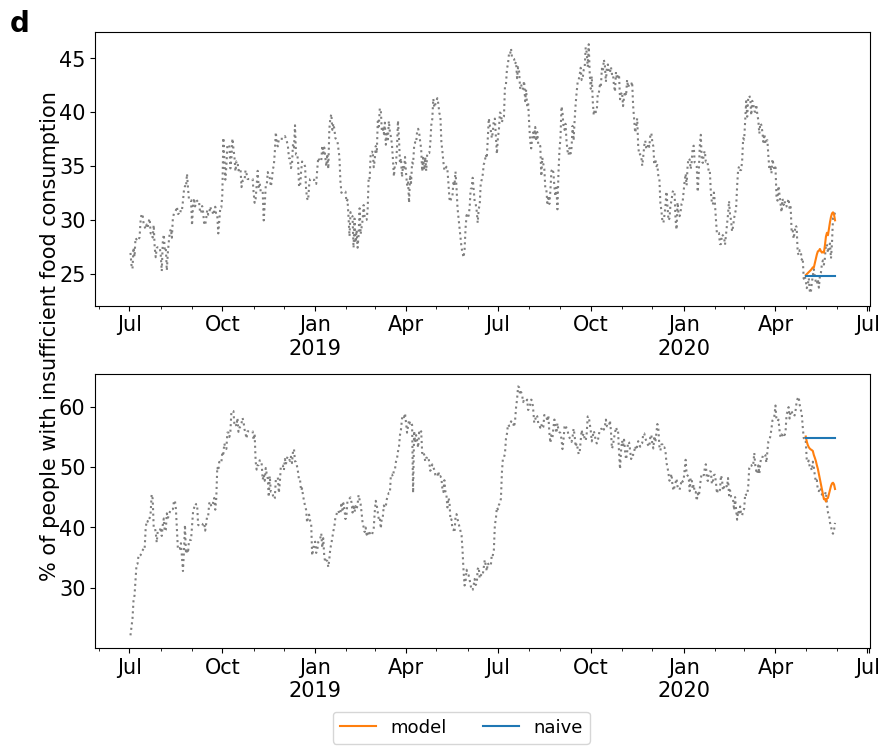

In [9]:
# Plot for paper.
fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = (10, 8))    
fig.subplots_adjust(hspace = .25)

plot_prediction(forecast_splits, REGIONS_PRED[COUNTRY][0][0], COUNTRY, REGIONS_PRED[COUNTRY][0][1], axs[0])
plot_prediction(forecast_splits, REGIONS_PRED[COUNTRY][1][0], COUNTRY, REGIONS_PRED[COUNTRY][1][1], axs[1])

fig.text(0.07, 0.5, "% of people with insufficient food consumption", va = "center", rotation = "vertical", 
         fontdict = {"size": 15})
axs.flatten()[0].get_legend().remove()
axs.flatten()[-1].legend(bbox_to_anchor = (0.65, -0.2), ncol = 2)

axs[0].text(-0.11, 1., "d", transform = axs[0].transAxes, 
            size = 20, weight='bold')

fig.savefig(OUTPUT_FOLDER + "/predictions.png", bbox_inches = "tight", dpi = 300)